# Lab Course Machine Learning
# Exercise Sheet 2
November 19th, 2021

Syed Wasif Murtaza Jafri-311226

## Part A: (Interesting stats)

### Maximum sale recorded

In [2]:

import pandas as pd

c =pd.read_csv('train.csv',low_memory=False)
td =pd.DataFrame(c)

#store with max sales
maxStoreId = td['Sales'].idxmax()
print (td.iloc[[maxStoreId],[0,1,3,4]])


       Store  DayOfWeek  Sales  Customers
44393    909          1  41551       1721


### least possible and maximum possible competition distance

In [4]:
c =pd.read_csv('store.csv',low_memory=False)
sd =pd.DataFrame(c)

#store with max competitionDistance 
maxcompId = sd['CompetitionDistance'].idxmax()
print ('maximum possible competition distance')
print (sd.iloc[[maxcompId],[0,1,3]])


maximum possible competition distance
     Store StoreType  CompetitionDistance
452    453         a              75860.0


In [8]:

#store with min competitionDistance
print ('Least possible competition distance')
min = sd['CompetitionDistance'].idxmin()
print ('maximum possible competition distance')
print (sd.iloc[[min],[0,1,3]])


Least possible competition distance
maximum possible competition distance
     Store StoreType  CompetitionDistance
515    516         a                 20.0


### Difference in the mean of sales (across all stores) when offering a Promo and not?

In [10]:
promoData = td[td["Promo"]==1]
promoData.groupby(['Store']).agg(['mean', 'count'])
#mean sales when promotion is running 
promoData = td[td["Promo"]==1]
meanpromot = promoData['Sales'].mean()

noPromoData = td[td["Promo"]==0]
meanNopromot = noPromoData['Sales'].mean()

print ('Difference in the mean of sales::',(meanpromot-meanNopromot))

Difference in the mean of sales:: 3585.1012408091174


### Are there any anomalies in the data as in where the store was "Open" but had no sales recorded?

In [13]:
nd = td.query('Open == 1 & Sales == 0')
df = nd.reindex(sorted(nd.columns), axis=1)
nd.sort_values(by=['Date']).head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
999016,762,4,2013-01-17,0,0,1,0,0,0
990681,232,4,2013-01-24,0,0,1,1,0,0
984098,339,3,2013-01-30,0,0,1,0,0,0
982983,339,4,2013-01-31,0,0,1,0,0,0
975098,259,4,2013-02-07,0,0,1,1,0,0


In [14]:
nd = td.query('Open == 0 & Sales != 0')
df = nd.reindex(sorted(nd.columns), axis=1)
nd.sort_values(by=['Date']).head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday


Yes, there exist anamoly, when the store is open and there were no sales recored. but anamoly for vice versa not exist()

### Which store type (’a’,’b’ etc.) has had the most sales?

In [17]:
td =pd.read_csv('train.csv',low_memory=False)
sd =pd.read_csv('store.csv',low_memory=False)
df = sd.append(td, sort=False)
df = pd.merge(td, sd, how="left", on=["Store"])
print(df.groupby(['StoreType'])['Sales'].sum())

StoreType
a    3165334859
b     159231395
c     783221426
d    1765392943
Name: Sales, dtype: int64


## Part B: (Plotting)

### Monthly mean of sales

In [96]:
td['Month']= pd.DatetimeIndex(td['Date']).month

In [18]:
td

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


,mean
monthYear,
2013-01,5211.555578
2013-02,5494.371397
2013-03,5820.349168
2013-04,5483.749836
2013-05,5364.127383


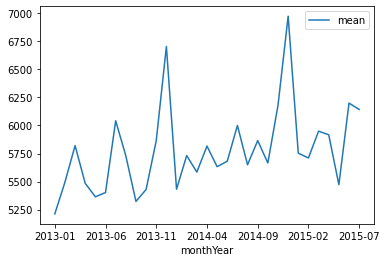

In [98]:
import matplotlib as plt
%matplotlib inline
td["monthYear"] = (td["Date"].astype("datetime64")).dt.strftime('%Y-%m')
monthData = pd.DataFrame(td.groupby(td["monthYear"])['Sales'].agg(['mean']))

monthData.plot(kind='line')
monthData.head()

### Daily  mean of sales

,mean
Date,
2013-01-01,87.284560
2013-01-02,6233.030493
2013-01-03,5693.112108
2013-01-04,5954.218834
2013-01-05,5337.751570


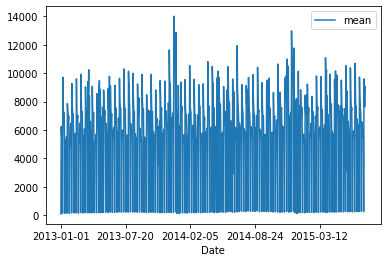

In [99]:
monthData = pd.DataFrame(td.groupby(td["Date"])['Sales'].agg(['mean']))

monthData.plot(kind='line')
monthData.head()

### Cumulative sales for the first year.

In [24]:

td["Year"] = (td["Date"].astype("datetime64")).dt.strftime('%Y')
td["Day"] = (td["Date"].astype("datetime64")).dt.strftime('%d')


ss =td.query("Store==1 & Year == '"+td["Year"].min()+"'")
ps = ss.sort_values(by=['Date'])
dd = ps[['Date','Sales']]

#.groupby(['Month', 'Day']).sum().groupby(level=0).cumsum()
#data = ss[['Month','Day','Sales']].groupby(['Month', 'Day']).sum().groupby(level=1).cumsum().reset_index()
# data['date'] = pd.to_datetime(data[['Month','Day']].assign(YEAR=td["Year"].min()))
# data.query('Month == 1 | Month == 2') 

In [25]:
dd['CumulativeSales'] = dd.Sales.cumsum()

<ipython-input-25-7362b1a414da>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dd['CumulativeSales'] = dd.Sales.cumsum()


In [26]:
dd= dd[['Date','CumulativeSales']]
dd.count()

Date               365
CumulativeSales    365
dtype: int64

In [19]:
import matplotlib.pyplot as pyplt
type(dsadas.style.hide_index())
fig = pyplt.figure()
ax = fig.add_subplot(1,1,1) 
   #to get a tick every 15 minutes
ax.xaxis.set_major_formatter(dsadas.Date('%H:%M')) 

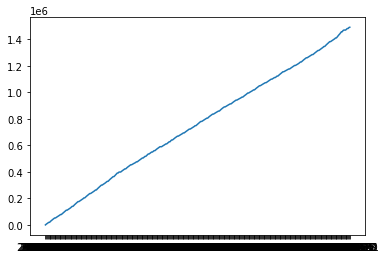

In [27]:
import matplotlib.pyplot as pyplt
pyplt.plot(dd.Date,dd.CumulativeSales)


## Exercise 2: Linear Regression

### Part A: (Implementing Gaussian Elimination)
After writing the funcitons from sudo code provided for gausian elimiantionm, forward elimination and backward solve, i passed x_transpose*x to gaussian function, and then result of gaussian elimation and x_transpose*y are passed to forward elimination, and result from forward elimnation is then passed to backward solve function, which gives the B parameters matrix.

In [32]:
import numpy as np
rows = 100
col = 10
mean, sd = 2, 0.01
def transpose(matrix):
    return [[row[i] for row in matrix] for i in range(len(matrix[0]))]


def multiplyMatrix(X, Y):
    return [[sum(a*b for a,b in zip(X_row,Y_col)) for Y_col in zip(*Y)] for X_row in X]

x = np.random.normal(mean, sd, (rows,col))
y = np.random.uniform(1,2,(rows,1))
bias_column = np.ones(shape=(rows,1))
A = np.append(bias_column,x,axis=1)


x_tran = np.transpose(A)
x_tran_x = np.dot(x_tran,A)

x_tran_y = np.dot(x_tran,y)
print(x_tran_y)


def Gaussian(mat):
    r,c =mat.shape
    if(r==c):
        for k in range (0,r-1):
            for i in range (k+1,r):
                mat[i][k]= mat[i][k]/mat[k][k]
               
                for j in range (k+1,r):
                    mat[i][j]= mat[i][j]-mat[i][k]*mat[k][j]
                
    else:
        print ('Dimensions of matrices are not correct for Gaussian Elimination')
    return mat
def forward(mat,b):
    r,c =mat.shape
      
    for k in range (0,r-1):
        for i in range (k+1,r):
            b[i]= b[i]-mat[i][k]*b[i]
    return b
def backward(mat,b):
    r,c =mat.shape
    x = np.zeros(shape=(r,1))
    for i in range(r-1, -1, -1):
        s = b[i]
        for j in range (i+1,r):
            s =s-mat[i][j]*x[j]
        x[i]=s/mat[i][i]
    return b
B=backward(Gaussian(x_tran_x),forward(Gaussian(x_tran_x),x_tran_y))


y_hat= np.dot(A,B)
print('y_hat',y_hat)


[[153.27294451]
 [306.17380561]
 [306.37557661]
 [306.60361307]
 [306.41872061]
 [306.39530509]
 [306.59043897]
 [306.49979969]
 [306.39079483]
 [306.52310091]
 [306.78997405]]
y_hat [[-2398773.39223729]
 [-2403784.49158563]
 [-2418072.59814438]
 [-2395371.19241301]
 [-2380451.16580477]
 [-2392287.68617898]
 [-2388807.4381774 ]
 [-2395998.9911305 ]
 [-2387229.03871097]
 [-2401302.3057517 ]
 [-2422441.867165  ]
 [-2407159.45915848]
 [-2407687.83033668]
 [-2404607.76824108]
 [-2384151.59261865]
 [-2386348.63171726]
 [-2413701.83099992]
 [-2394220.66988416]
 [-2390835.45684557]
 [-2425580.58916502]
 [-2403179.00413475]
 [-2426614.76968767]
 [-2392677.6845118 ]
 [-2404985.43616723]
 [-2390383.65609907]
 [-2380876.2449235 ]
 [-2396098.75123243]
 [-2375618.75736636]
 [-2407797.68558379]
 [-2395032.78079963]
 [-2407903.53513572]
 [-2399052.43754873]
 [-2391324.98440729]
 [-2391231.41578494]
 [-2406592.56437425]
 [-2393798.26711161]
 [-2396643.12315594]
 [-2397382.17746941]
 [-2419269.58364105

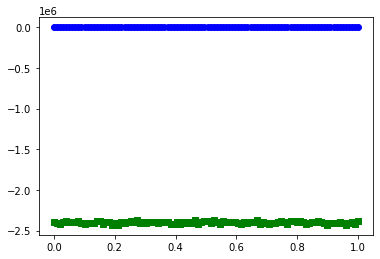

In [33]:
import matplotlib.pyplot as plt
axis = np.linspace(0, 1, 100)
plt.scatter(axis, y, c='b', marker='o', label='Y')
plt.scatter(axis, y_hat, c='g', marker='s', label='Y_hat')
plt.show()

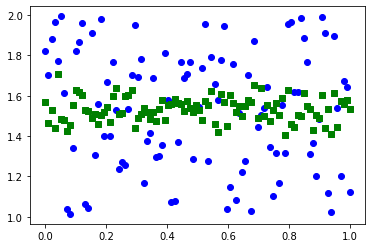

In [34]:
B = np.linalg.lstsq(A, y, rcond=None)[0]
y_hat= np.dot(A,B)

import matplotlib.pyplot as plt
axis = np.linspace(0, 1, 100)
plt.scatter(axis, y, c='b', marker='o', label='Y')
plt.scatter(axis, y_hat, c='g', marker='s', label='Y_hat')
plt.show()


### Part B: Multiple Linear (Auto)Regression
First I merged the datasets of train and store. then I grouped the dataframe by store and date columns.I am then looping through for every store and converting dataframes of Sales columns for every store into first row of matrix which is already sorted by days. There were only 10 records which have in total 942 days sales. For store which have less than 942 records, I am appending zeros and in this way creating x matrix. after which creating x_train,y_train,x_test,y_test matrices from x. and finding values of B matric from solving for linear regression as last lab.For every 42 iterations for b, i am storing b vectors in on matrix. After that finding RMSE.

In [27]:
td =pd.read_csv('train.csv',low_memory=False)
sd =pd.read_csv('store.csv.',low_memory=False)
merge = pd.merge(td,sd,how='inner',on='Store')
#td.drop(columns=['DayOfWeek', 'Customers','Promo','SchoolHoliday','StateHoliday','Open'])
merge


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,2013-01-05,4771,339,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017205,1115,5,2013-01-04,4540,326,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017206,1115,4,2013-01-03,4297,300,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017207,1115,3,2013-01-02,3697,305,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [ ]:
9import matplotlib as plt
%matplotlib inline
td["monthYear"] =  
monthData = pd.DataFrame(td.groupby(td["monthYear"])['Sales'].agg(['mean']))
monthData.plot(kind='line')

In [142]:
#td.groupby(['Store']).count()

#nd = td.drop(columns=['DayOfWeek', 'Customers','Promo','SchoolHoliday','Open'])
#td = td.sort_values(["Store", "Date"], ascending = (True, True)).reset_index()
nd = merge.groupby(['Store','Date']).sum()


In [143]:
nd

DayOfWeek  Sales  Customers  Open  Promo  SchoolHoliday  \
Store Date                                                                  
1     2013-01-01          2      0          0     0      0              1   
      2013-01-02          3   5530        668     1      0              1   
      2013-01-03          4   4327        578     1      0              1   
      2013-01-04          5   4486        619     1      0              1   
      2013-01-05          6   4997        635     1      0              1   
...                     ...    ...        ...   ...    ...            ...   
1115  2015-07-27          1  10712        608     1      1              1   
      2015-07-28          2   8093        500     1      1              1   
      2015-07-29          3   7661        473     1      1              1   
      2015-07-30          4   8405        502     1      1              1   
      2015-07-31          5   8680        538     1      1              1   

                  CompetitionDistance  CompetitionOpenSinceMonth  \
Store Date                                                         
1     2013-01-01               1270.0                        9.0   
      2013-01-02               1270.0                        9.0   
      2013-01-03               1270.0                        9.0   
      2013-01-04               1270.0                        9.0   
      2013-01-05               1270.0                        9.0   
...                               ...                        ...   
1115  2015-07-27               5350.0                        0.0   
      2015-07-28               5350.0                        0.0   
      2015-07-29               5350.0                        0.0   
      2015-07-30               5350.0                        0.0   
      2015-07-31               5350.0                        0.0   

                  CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  \
Store Date                                                            
1     2013-01-01                    2008.0       0              0.0   
      2013-01-02                    2008.0       0              0.0   
      2013-01-03                    2008.0       0              0.0   
      2013-01-04                    2008.0       0              0.0   
      2013-01-05                    2008.0       0              0.0   
...                                    ...     ...              ...   
1115  2015-07-27                       0.0       1             22.0   
      2015-07-28                       0.0       1             22.0   
      2015-07-29                       0.0       1             22.0   
      2015-07-30                       0.0       1             22.0   
      2015-07-31                       0.0       1             22.0   

                  Promo2SinceYear  
Store Date                         
1     2013-01-01              0.0  
      2013-01-02              0.0  
      2013-01-03              0.0  
      2013-01-04              0.0  
      2013-01-05              0.0  
...                           ...  
1115  2015-07-27           2012.0  
      2015-07-28           2012.0  
      2015-07-29           2012.0  
      2015-07-30           2012.0  
      2015-07-31           2012.0  

[1017209 rows x 12 columns]

In [145]:
rows = len(nd.index)
x = np.zeros(shape=(rows,942))
print(rows)
index = 0
for store, new_df in nd.groupby(level=0):
    number_column = new_df.loc[:,'Sales']
    b= np.zeros(shape=(1,942))
    numbers = number_column.values
    if (len(numbers)<942):
        
        a = np.zeros((1,942-len(numbers)))
        numbers = np.append(numbers,a)
    x[index,:]=numbers
    index= index+1
print (x)

1017209
[[   0. 5530. 4327. ... 4782. 5020. 5263.]
 [   0. 4422. 4159. ... 6402. 5567. 6064.]
 [   0. 6823. 5902. ... 7610. 8977. 8314.]
 ...
 [   0.    0.    0. ...    0.    0.    0.]
 [   0.    0.    0. ...    0.    0.    0.]
 [   0.    0.    0. ...    0.    0.    0.]]


In [151]:
x_train = x[0:800,0:900]
y_train = x[0:800,900:943]
x_test = x[800:1000,0:900]
y_test = x[800:1000,900:943]
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
bias_column = np.ones(shape=(800,1))
A = np.append(bias_column,x_train,axis=1)
bias_column = np.ones(shape=(800,1))
B = np.zeros(shape=(42,901))
for i in range (0,42):
    aTranspose = np.transpose(A)
    aTran_a = np.matmul(aTranspose,A)
    aTran_a_inv = np.linalg.inv(aTran_a)

    aTran_y = np.matmul(aTranspose,y_train[:,i])
       
    b = np.matmul ((aTran_a_inv),(aTran_y))
    B[i,:]= b   
    
print(B.shape)
    


(800, 900)
(800, 42)
(200, 900)
(200, 42)
(42, 901)


In [177]:
bias_column = np.ones(shape=(200,1))
A_test= np.append(bias_column,x_test,axis=1)
print(A_test.shape)
y_hat_test = np.zeros(shape=(200, 42))
for i in range (0,42):
    y = np.matmul(A_test,np.transpose(B[i,:]))
    
    y_hat_test[:,i] = y

print(y_hat_test)

(200, 901)
[[ 68500.68969727  71262.44213867  43189.03271484 ...  59319.96826172
   83573.36230469 102244.1328125 ]
 [ 49287.37988281   9177.03100586  12270.60095215 ...  44640.62719727
   85267.05297852 112968.09106445]
 [ -2809.5612793   40208.50805664 -30184.32879639 ... -34250.36120605
   17273.62561035  -2710.7722168 ]
 ...
 [ 56438.08959961  27814.15600586  41082.89086914 ...  68104.33886719
   97599.09545898 118237.27648926]
 [ 13696.83300781  12844.22363281 -35911.95501709 ... -24306.86535645
   31095.93347168  58813.05285645]
 [150206.48754883  57331.34912109  81992.12310791 ... 134882.63391113
  128521.21032715 163513.37634277]]


In [179]:
y_minus_y_hat = y_test- y_hat_test 
RMSE = np.ones(shape=(42,1))
print(y_minus_y_hat.shape)
for i in range(42):
    y = y_minus_y_hat[:,i]
    rmse = 0
    for j in range (200):
        rmse = rmse + (y[j]*y[j])
    rmse = (rmse ** 0.5)/2
    RMSE[i]=rmse
    
print(RMSE)
        

(200, 42)
[[1.02792707e+18]
 [4.87243602e+17]
 [1.10221415e+18]
 [1.05057074e+18]
 [1.05315372e+18]
 [1.04307083e+18]
 [1.11332567e+18]
 [1.05966075e+18]
 [5.01515025e+17]
 [1.84166906e+18]
 [1.79723478e+18]
 [1.49952370e+18]
 [1.41663744e+18]
 [1.41978899e+18]
 [9.98477095e+17]
 [5.11525813e+17]
 [1.26474165e+18]
 [1.09124893e+18]
 [1.15968435e+18]
 [1.15740433e+18]
 [1.17879216e+18]
 [1.03493426e+18]
 [5.24919021e+17]
 [1.70021129e+18]
 [1.49972188e+18]
 [1.43502062e+18]
 [1.38114471e+18]
 [1.31536365e+18]
 [1.06342092e+18]
 [5.42996458e+17]
 [1.20883618e+18]
 [1.07184859e+18]
 [1.04257319e+18]
 [1.09988145e+18]
 [1.09830368e+18]
 [9.62903722e+17]
 [5.26430884e+17]
 [1.65334672e+18]
 [1.44202719e+18]
 [1.35776634e+18]
 [1.40318692e+18]
 [1.62389534e+18]]
